# Introduction to the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders'
, 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [2]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [4]:
continuous_value_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_value_cols]
numeric_cars = numeric_cars.replace('?', np.nan)

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# Ensure all values all numeric
numeric_cars = numeric_cars.astype('float')

# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])

# Fill missing data in other columns with corresponding mean value.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [7]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
prices = numeric_cars['price'] # The target column must be kept

# Normalize the values
normalized_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = prices

In [9]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Test

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature, target, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
    
    # Shuffle order of rows in the dataframe
    shuffled_idx = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_idx)
    
    # Split the data into train set and test set
    mid = df.shape[0] // 2
    train_df = rand_df.iloc[:mid]
    test_df = rand_df.iloc[mid:]
    
    # Train the model
    model.fit(train_df[[feature]], train_df[target])
    predictions = model.predict(test_df[[feature]])
    
    # Calculate the MSE & RMSE
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)    
    return rmse

In [11]:
rmse_results = {}
train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    rmse_results[col] = knn_train_test(col, 'price', normalized_cars)

# Display RMSEs in ascending order
rmse_results_series = pd.Series(rmse_results)
pd.Series(rmse_results_series).sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## Hyperparameter Variation

In [12]:
def knn_train_test(feature, target, df, k):
    model = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Shuffle order of rows in the dataframe
    shuffled_idx = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_idx)
    
    # Split the data into train set and test set
    mid = df.shape[0] // 2
    train_df = rand_df.iloc[:mid]
    test_df = rand_df.iloc[mid:]
    
    # Train the model
    model.fit(train_df[[feature]], train_df[target])
    predictions = model.predict(test_df[[feature]])
    
    # Calculate the MSE & RMSE
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)    
    return rmse    

In [13]:
k_rmse_results = {}

for col in train_cols:        
    k_rmse_results[col] = {}    
    for k in range(1, 10, 2):    
        k_rmse_results[col][k] = knn_train_test(col, 'price', normalized_cars, k)
        
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.849263088

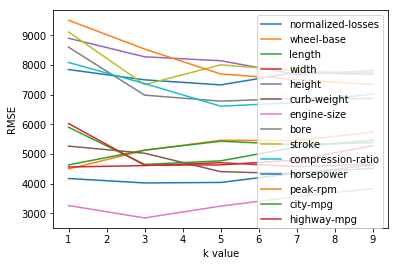

In [14]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())    
    plt.plot(x, y, label=k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper right')

# Multivariate Test

In [15]:
def knn_train_test(features, target, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
    
    # Shuffle order of rows in the dataframe
    shuffled_idx = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_idx)
    
    # Split the data into train set and test set
    mid = df.shape[0] // 2
    train_df = rand_df.iloc[:mid]
    test_df = rand_df.iloc[mid:]
    
    # Train the model
    model.fit(train_df[features], train_df[target])
    predictions = model.predict(test_df[features])
    
    # Calculate the MSE & RMSE
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)    
    return rmse

In [16]:
feature_avg_rmses = {k: np.mean(list(v.values())) for k, v in k_rmse_results.items()}
avg_rmses_series = pd.Series(feature_avg_rmses)
avg_rmses_series.sort_values(inplace=True)

print(avg_rmses_series)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [17]:
best_features = list(avg_rmses_series.index)
best_features_rmses = {}

for i in range(2,6):
    key = '{} best features'.format(i)
    best_features_rmses[key] = knn_train_test(best_features[:i], 'price', normalized_cars)
    
best_features_rmses

{'2 best features': 2949.8817277180374,
 '3 best features': 3580.7376651928435,
 '4 best features': 3487.340917327035,
 '5 best features': 3410.2170133901805}

## Hyperparameter Variation

In [18]:
def knn_train_test(features, target, df, k):
    model = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Shuffle order of rows in the dataframe
    shuffled_idx = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_idx)
    
    # Split the data into train set and test set
    mid = df.shape[0] // 2
    train_df = rand_df.iloc[:mid]
    test_df = rand_df.iloc[mid:]
    
    # Train the model
    model.fit(train_df[features], train_df[target])
    predictions = model.predict(test_df[features])
    
    # Calculate the MSE & RMSE
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)    
    return rmse

In [19]:
k_best_features_rmses = {}

for n in range(3,6):
    key = '{} best features'.format(n)
    k_best_features_rmses[key] = {}
    for k in range(25):
        k_best_features_rmses[key][k+1] = knn_train_test(best_features[:n], 'price', normalized_cars, k+1)
    
k_best_features_rmses

{'3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.225713011904,
  16: 4408.838883583756,
  17: 4404.781029718083,
  18: 4447.577705091259,
  19: 4537.049753345422,
  20: 4592.444230865941,
  21: 4636.731219491763,
  22: 4721.248544133379,
  23: 4787.943506313775,
  24: 4802.894378990491,
  25: 4816.708120139092},
 '4 best features': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.30477296

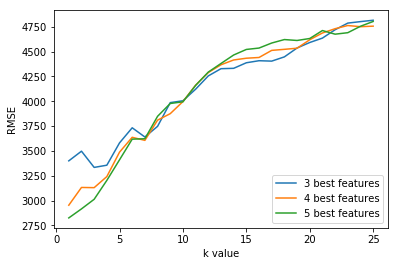

In [20]:
for k, v in k_best_features_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='lower right')

# Using KFold

In [21]:
from sklearn.model_selection import KFold, cross_val_score

## Univariate Test

In [22]:
def knn_kfold_train_test(feature, target, df):
    np.random.seed(1)    
    knn = KNeighborsRegressor()
    kf = KFold(shuffle=True)
    mses = cross_val_score(knn, normalized_cars[[feature]], normalized_cars[target], cv=kf)
    rmse = np.sqrt(np.mean(mses))
    return rmse

rmse_results = {}
for col in train_cols:
    rmse_results[col] = knn_kfold_train_test(col, 'price', normalized_cars)
        
rmse_results

{'bore': 0.5356408907547001,
 'city-mpg': 0.8403804151165207,
 'compression-ratio': 0.4569582980297013,
 'curb-weight': 0.848466254027212,
 'engine-size': 0.9130271615397084,
 'height': 0.17010533751769663,
 'highway-mpg': 0.8416354581127811,
 'horsepower': 0.8695611956175089,
 'length': 0.7471793509704183,
 'normalized-losses': 0.3229518172557272,
 'peak-rpm': 0.381966298984149,
 'stroke': 0.35790198769891873,
 'wheel-base': 0.662906244117386,
 'width': 0.8434599449720379}

## Multivariate Test with Hyperparameter Variation

In [23]:
def knn_kfold_train_test(features, target, df, k):
    np.random.seed(1)    
    knn = KNeighborsRegressor(n_neighbors=k)
    kf = KFold(shuffle=True)
    mses = cross_val_score(knn, normalized_cars[features], normalized_cars[target], cv=kf)
    rmse = np.sqrt(np.mean(mses))
    return rmse

In [24]:
k_best_features_rmses = {}

for n in range(3,6):
    key = '{} best features'.format(n)
    k_best_features_rmses[key] = {}
    for k in range(25):
        k_best_features_rmses[key][k+1] = knn_kfold_train_test(best_features[:n], 'price', normalized_cars, k+1)
    
k_best_features_rmses

{'3 best features': {1: 0.9221460910456302,
  2: 0.9361575564944811,
  3: 0.9344803856436509,
  4: 0.9236982181142047,
  5: 0.9107367807721939,
  6: 0.9047340382074954,
  7: 0.9011168193037844,
  8: 0.9006704095109093,
  9: 0.9007304969109824,
  10: 0.8947289939019192,
  11: 0.8855762460722104,
  12: 0.8789768648177356,
  13: 0.8693487106612171,
  14: 0.8654066989035238,
  15: 0.8612745745413087,
  16: 0.8571821149788788,
  17: 0.8505569341705147,
  18: 0.8470698004616009,
  19: 0.8434200303493466,
  20: 0.8401845414172684,
  21: 0.8369176445132784,
  22: 0.8339124371364403,
  23: 0.8298409872663715,
  24: 0.8251270279936188,
  25: 0.8204318789498006},
 '4 best features': {1: 0.936896319639068,
  2: 0.9357537674230135,
  3: 0.929984943950274,
  4: 0.9215408981441667,
  5: 0.9130382408537551,
  6: 0.9067558869748793,
  7: 0.8993297497318884,
  8: 0.8964704605045873,
  9: 0.8922913476136366,
  10: 0.8900945022008316,
  11: 0.8873360378968338,
  12: 0.8795068242129213,
  13: 0.87372714893

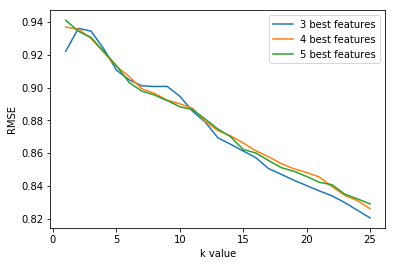

In [25]:
for k, v in k_best_features_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper right')